## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import pickle
import os

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the cornerss
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        print(fname)
        cv2.waitKey(500)

cv2.destroyAllWindows()

camera_cal\calibration10.jpg
camera_cal\calibration11.jpg
camera_cal\calibration12.jpg
camera_cal\calibration13.jpg
camera_cal\calibration14.jpg
camera_cal\calibration15.jpg
camera_cal\calibration16.jpg
camera_cal\calibration17.jpg
camera_cal\calibration18.jpg
camera_cal\calibration19.jpg
camera_cal\calibration2.jpg
camera_cal\calibration20.jpg
camera_cal\calibration3.jpg
camera_cal\calibration6.jpg
camera_cal\calibration7.jpg
camera_cal\calibration8.jpg
camera_cal\calibration9.jpg


## And so on and so forth...

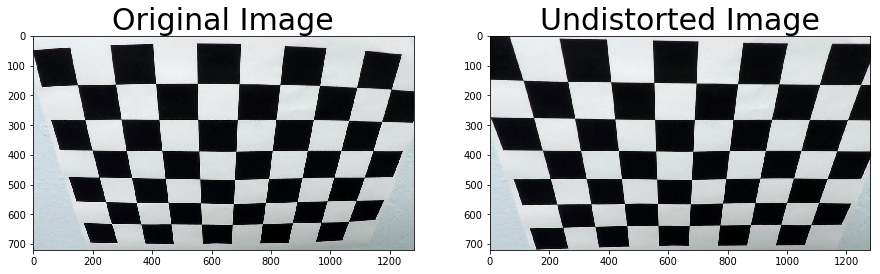

In [2]:
img = cv2.imread('camera_cal/calibration2.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [ ]:
# Save the camera calibration result for later use
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_dist_pickle.p", "wb" ) )

(1280, 720)


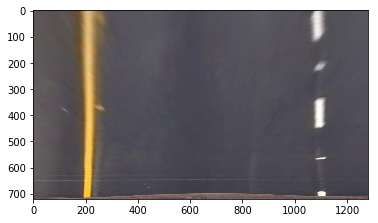

In [51]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import pickle
import os

def undistortImage(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

image = mpimg.imread('test_images/straight_lines1.jpg')
#plt.imshow(image)
#plt.show()
print((image.shape[1],image.shape[0]))
#plt.plot(0.16*image.shape[1],image.shape[0],'.')
#plt.plot(0.86*image.shape[1],image.shape[0],'.')
#plt.plot(0.48*image.shape[1],0.6*image.shape[0],'.')
#plt.plot(0.51*image.shape[1],0.6*image.shape[0],'.')

def warpImage(img, toBird = True):
    # TALVEZ PRECISA MELHORAR
    img_size = (img.shape[1],img.shape[0])
    src = np.float32([[0.14*img.shape[1],img.shape[0]],[0.86*img.shape[1],img.shape[0]],[0.55*img.shape[1],0.64*img.shape[0]],[0.45*img.shape[1],0.64*img.shape[0]]])
    dst = np.float32([[0.14*img.shape[1],img.shape[0]],[0.86*img.shape[1],img.shape[0]],[0.86*img.shape[1],0],[0.14*img.shape[1],0]])

    if(toBird == True):
        M = cv2.getPerspectiveTransform(src, dst)
    else:
        M = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped
plt.imshow(warpImage(undistortImage(image)))
plt.show()

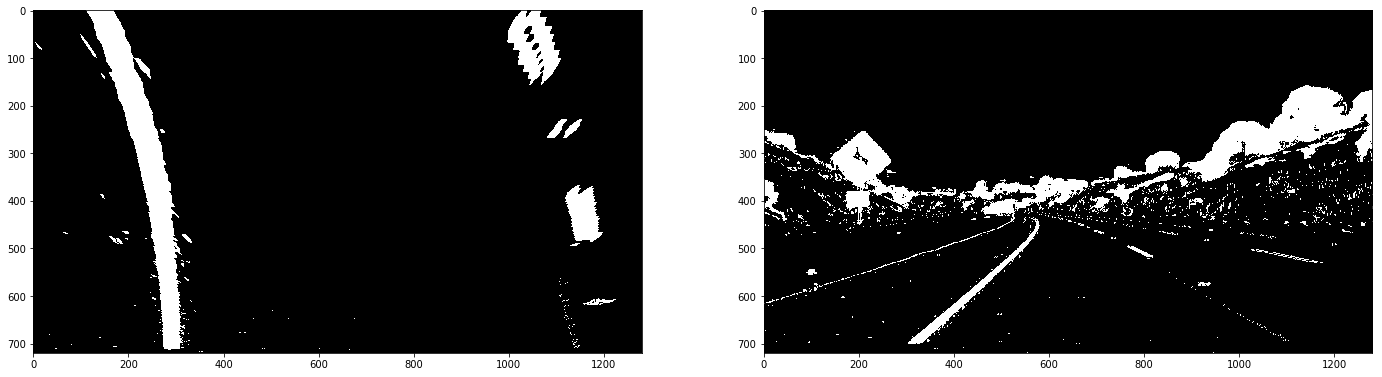

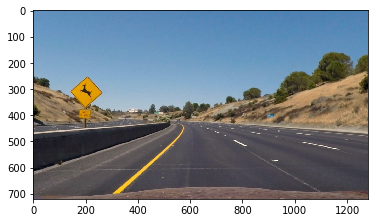

In [26]:
#def thresholdImage(img, s_thresh=(120, 255), sx_thresh=(20, 100),l_thresh=(40,255)):
#    
#    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#    h_channel = hls[:,:,0]
#    l_channel = hls[:,:,1]
#    s_channel = hls[:,:,2]
#    
#    sx_thresh = (20,255)
#    
#    # gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#    
#    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) 
#    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
#    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
#    sxbinary = np.zeros_like(scaled_sobel)
#    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
#    #binary_output = 255*np.dstack((sxbinary,sxbinary,sxbinary)).astype('uint8')
#    binary_output = sxbinary
#    return binary_output

#def hls_select(img, thresh=(0, 255)):
#    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
#    S = hls[:,:,2]
#    binary_output = np.zeros_like(S)
#    binary_output[(S > thresh[0]) & (S<= thresh[1])] = 1
#    # 1) Convert to HLS color space
#    # 2) Apply a threshold to the S channel
#    # 3) Return a binary image of threshold result
#    #binary_output = np.copy(img) # placeholder line
#    return binary_output
#
def thresholdImage(img, s_thresh=(120, 255), sx_thresh=(30, 255),l_thresh=(40,255), h_thresh=(20,100)):
    img = np.copy(img)
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) 
    abs_sobelx = np.absolute(sobelx) 
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold saturation channel
    h_binary = np.zeros_like(s_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    
    # Threshold saturation channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

    # Threshold lightness
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
    
    channels = 255*np.dstack(( l_binary, sxbinary, s_binary)).astype('uint8')        
    binary = np.zeros_like(sxbinary)
    #binary[((l_binary == 1) & (s_binary == 1) | (sxbinary==1)) ] = 1
    #binary[((l_binary == 1) & (s_binary == 1) &  (h_binary == 1) | (sxbinary==1)) ] = 1
    binary[((l_binary == 1) & (s_binary == 1) |  (h_binary == 1) | (sxbinary==1)) ] = 1
    
    #binary = 255*np.dstack((binary,binary,binary)).astype('uint8')            
    return  binary



image = mpimg.imread('test_images/test2.jpg')
# a= thresholdImage(image)
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))

ax1.imshow(warpImage(thresholdImage(undistortImage(image))),cmap='gray')

ax2.imshow(thresholdImage(undistortImage(image)),cmap='gray')

plt.show()
#plt.imshow(binarize(image),cmap='gray')
plt.imshow(undistortImage(image))
plt.show()

[245 246 247 ..., 308 312 313]
[560 560 560 ..., 639 639 639]


(720, 0)

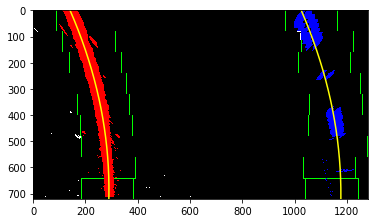

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

binary_warped = warpImage(thresholdImage(undistortImage(image)))
# Assuming you have created a warpImageed binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    if window == 1:
        print(nonzerox[good_left_inds])
        print(nonzeroy[good_left_inds])
        
        

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)


# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)


# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

(720, 0)

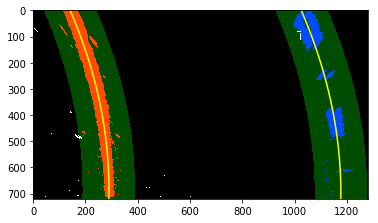

In [28]:
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

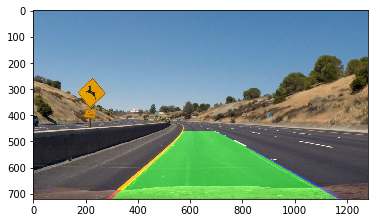

In [29]:
def draw_lane(original_img, binary_img, l_fit, r_fit):
    
    if l_fit is None or r_fit is None:
        return original_img
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    img_shape = binary_img.shape
    ploty = np.linspace(0, img_shape[0]-1, num=img_shape[0])
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]

    
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,0), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,0,255), thickness=15)
    
    newwarp = warpImage(color_warp, toBird = False)
    
    # Combine the result with the original image
    result = cv2.addWeighted(original_img, 1, newwarp, 0.5, 0)
    return result

plt.imshow(draw_lane(image,binary_warped,left_fit,right_fit))

In [46]:
def calculate_radius_and_center(binary_warped,left_fit,right_fit,left_lane_inds, right_lane_inds):
    nonzero = binary_warped.nonzero()
    nonzerox = np.array(nonzero[1])
    nonzeroy = np.array(nonzero[0])
    asd = left_fit[0]*binary_warped.shape[0]**2 + left_fit[1]*binary_warped.shape[0] + left_fit[2]
    asd2 = right_fit[0]*binary_warped.shape[0]**2 + right_fit[1]*binary_warped.shape[0] + right_fit[2]
    
    center = binary_warped.shape[1]/2 -  (asd+asd2)/2
    mppx = 3.7 / (0.86*binary_warped.shape[1] -  0.14*binary_warped.shape[1])# 3.7/ (0.86*binary_warped.shape[1] -  0.14*binary_warped.shape[1])  is meters per pixel in x axis
    center = mppx * center
    
    
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    
    mpp = 30/binary_warped.shape[0] # meters per pixel in y axis
    left_fit_cr = np.polyfit(lefty*mpp, leftx*mppx, 2)
    right_fit_cr = np.polyfit(righty*mpp, rightx*mppx, 2)
    left_radius = ((1 + (2*left_fit_cr[0]*binary_warped.shape[0]*mpp + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_radius = ((1 + (2*right_fit_cr[0]*binary_warped.shape[0]*mpp + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    
    return center, (left_radius+right_radius)/2


print(calculate_radius_and_center(binary_warped,left_fit,right_fit,left_lane_inds, right_lane_inds))
    

(-0.37407006136664228, 692.23676951928678)


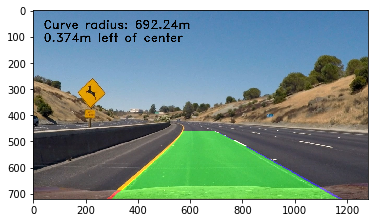

In [50]:
def draw_data(original_img, curv_rad, center_dist):
    new_img = np.copy(original_img)
    h = new_img.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(new_img, text, (40,70), font, 1.5, (0,0,0), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
    cv2.putText(new_img, text, (40,120), font, 1.5, (0,0,0), 2, cv2.LINE_AA)
    return new_img
(center,radius) = calculate_radius_and_center(binary_warped,left_fit,right_fit,left_lane_inds, right_lane_inds)
exampleImg_out2 = draw_data(draw_lane(image,binary_warped,left_fit,right_fit), radius, center)
plt.imshow(exampleImg_out2)
